In [1]:
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pickle
%matplotlib inline

In [2]:
with open('dataset_tl_real.pickle_3', 'rb') as f:
    (X_train, Y_train) = pickle.load(f)
with open('dataset_tl_real.pickle_2', 'rb') as f:
    (X_train_2, Y_train_2) = pickle.load(f)
    X_train = np.vstack((X_train,X_train_2))
    Y_train = np.append(Y_train,Y_train_2)
with open('dataset_tl_real.pickle_1', 'rb') as f:
    (X_train_2, Y_train_2) = pickle.load(f)
    X_train = np.vstack((X_train,X_train_2))
    Y_train = np.append(Y_train,Y_train_2)
with open('dataset_tl_real.pickle_0', 'rb') as f:
    (X_train_2, Y_train_2) = pickle.load(f)
    X_train = np.vstack((X_train,X_train_2))
    Y_train = np.append(Y_train,Y_train_2)
with open('dataset_tl_1.pickle', 'rb') as f:
    (X_train_2, Y_train_2) = pickle.load(f)
    for index in range(Y_train_2.shape[0]):
        if Y_train_2[index] == 1:
            Y_train_2[index] = 3
    X_train = np.vstack((X_train,X_train_2))
    Y_train = np.append(Y_train,Y_train_2)  
with open('dataset_tl_sim_3.pickle', 'rb') as f:
    (X_train_2, Y_train_2) = pickle.load(f)
    X_train = np.vstack((X_train,X_train_2))
    Y_train = np.append(Y_train,Y_train_2)
with open('dataset_tl_sim_2.pickle', 'rb') as f:
    (X_train_2, Y_train_2) = pickle.load(f)
    X_train = np.vstack((X_train,X_train_2))
    Y_train = np.append(Y_train,Y_train_2)
with open('dataset_tl_sim_1.pickle', 'rb') as f:
    (X_train_2, Y_train_2) = pickle.load(f)
    X_train = np.vstack((X_train,X_train_2))
    Y_train = np.append(Y_train,Y_train_2)
with open('dataset_tl_sim_0.pickle', 'rb') as f:
    (X_train_2, Y_train_2) = pickle.load(f)
    X_train = np.vstack((X_train,X_train_2))
    Y_train = np.append(Y_train,Y_train_2)
    
print("Train shape: ")
print(X_train.shape)
print(Y_train.shape)
X_train_2 = []
Y_train_2 = []

Train shape: 
(4154, 600, 800, 3)
(4154,)


In [3]:
X_train, Y_train = shuffle(X_train, Y_train)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

print("Train shape: ")
print(X_train.shape)
print("Valid shape: ")
print(X_valid.shape)

Train shape: 
(3115, 600, 800, 3)
Valid shape: 
(1039, 600, 800, 3)


1.0


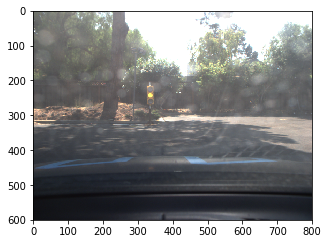

In [28]:
from random import randint
with tf.Session() as sess:
    number = randint(0,3115)
    newimg2 = cv2.cvtColor(X_train[number], cv2.COLOR_RGB2BGR);
    print(Y_train[number])
    plt.figure(figsize=(5,5))
    plt.imshow(newimg2)
    plt.show()

In [29]:
n_classes = 4
Class_names = ["RED","YELLOW", "GREEN", "UNKNOWN"]

layer1 = (5,5,3,4)
layer2 = (5,5,4,5)
layer3 = (5,5,5,6)
layer4 = (5,5,6,7)
layer5 = (5,5,7,7)
layer6 = (2058,32)
layer7 = (32,16)
layer8 = (16,n_classes)

from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.15

conv1_W = tf.Variable(tf.truncated_normal(shape=layer1, mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(layer1[3]))

conv2_W = tf.Variable(tf.truncated_normal(shape=layer2, mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(layer2[3]))

conv3_W = tf.Variable(tf.truncated_normal(shape=layer3, mean = mu, stddev = sigma))
conv3_b = tf.Variable(tf.zeros(layer3[3]))

conv4_W = tf.Variable(tf.truncated_normal(shape=layer4, mean = mu, stddev = sigma))
conv4_b = tf.Variable(tf.zeros(layer4[3]))

conv5_W = tf.Variable(tf.truncated_normal(shape=layer5, mean = mu, stddev = sigma))
conv5_b = tf.Variable(tf.zeros(layer5[3]))

fc1_W = tf.Variable(tf.truncated_normal(shape=layer6, mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(layer6[1]))

fc2_W  = tf.Variable(tf.truncated_normal(shape=layer7, mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(layer7[1]))

fc3_W  = tf.Variable(tf.truncated_normal(shape=layer8, mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(n_classes))

keep_prob = tf.placeholder("float", name = "keep_prob")

def LeNet(x):    
    x = tf.image.resize_images(x,[600,800])
    
    x = tf.map_fn(lambda img: tf.image.random_flip_left_right(img), x)
    x = tf.map_fn(lambda img: tf.image.random_brightness(img,0.2), x)
    x = tf.map_fn(lambda img: tf.image.random_hue(img,0.1), x)
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    x_color = x[:,:,:,0:3]
    conv1 = tf.nn.conv2d(x_color, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv4 = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    conv4 = tf.nn.relu(conv4)
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv5 = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    conv5 = tf.nn.relu(conv5)
    conv5 = tf.nn.max_pool(conv5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #fc0   = tf.concat([flatten(conv5),flatten(conv4)],1)
    fc0   = flatten(conv5)
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1   = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
    
#x = tf.placeholder(tf.float32, (None, 600, 800, 3), name = "input_image")
#x = tf.placeholder(tf.float32, (None, 1096, 1368, 3), name = "input_image_new")
x = tf.placeholder(tf.float32, (None, None, None, 3), name = "input_image_new")
y = tf.placeholder(tf.int32, (None), name = "correct_class")
print(y)
one_hot_y = tf.one_hot(y, n_classes, name = "one_hot_output")

rate = 0.002
beta = 0.002

logits = LeNet(x)
output_value = tf.argmax(logits, 1, name = "output")
print(x)
print(one_hot_y)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y, name = "cross_entropy")
loss_operation = tf.reduce_mean(cross_entropy + \
    beta*tf.nn.l2_loss(conv1_W) + \
    beta*tf.nn.l2_loss(conv2_W) + \
    beta*tf.nn.l2_loss(conv3_W) + \
    beta*tf.nn.l2_loss(conv4_W) + \
    beta*tf.nn.l2_loss(conv5_W) + \
    beta*tf.nn.l2_loss(fc1_W) + \
    beta*tf.nn.l2_loss(fc2_W))
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Tensor("correct_class:0", dtype=int32)
Tensor("input_image_new:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("one_hot_output:0", dtype=float32)


In [30]:
EPOCHS = 500
BATCH_SIZE = 32
with tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.5))) as sess:
#with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, Y_train = shuffle(X_train, Y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], Y_train[offset:end]
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5})
            
        training_accuracy = evaluate(X_train, Y_train)
        validation_accuracy = evaluate(X_valid, Y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        saver.save(sess, './lenet')        
    
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.454
Validation Accuracy = 0.448

EPOCH 2 ...
Training Accuracy = 0.458
Validation Accuracy = 0.446

EPOCH 3 ...
Training Accuracy = 0.471
Validation Accuracy = 0.460

EPOCH 4 ...
Training Accuracy = 0.522
Validation Accuracy = 0.511

EPOCH 5 ...
Training Accuracy = 0.553
Validation Accuracy = 0.537

EPOCH 6 ...
Training Accuracy = 0.665
Validation Accuracy = 0.656

EPOCH 7 ...
Training Accuracy = 0.676
Validation Accuracy = 0.664

EPOCH 8 ...
Training Accuracy = 0.730
Validation Accuracy = 0.717

EPOCH 9 ...
Training Accuracy = 0.708
Validation Accuracy = 0.696

EPOCH 10 ...
Training Accuracy = 0.757
Validation Accuracy = 0.748

EPOCH 11 ...
Training Accuracy = 0.756
Validation Accuracy = 0.746

EPOCH 12 ...
Training Accuracy = 0.765
Validation Accuracy = 0.734

EPOCH 13 ...
Training Accuracy = 0.765
Validation Accuracy = 0.758

EPOCH 14 ...
Training Accuracy = 0.793
Validation Accuracy = 0.784

EPOCH 15 ...
Training Accuracy = 0.787
Valid

EPOCH 122 ...
Training Accuracy = 0.974
Validation Accuracy = 0.923

EPOCH 123 ...
Training Accuracy = 0.981
Validation Accuracy = 0.934

EPOCH 124 ...
Training Accuracy = 0.972
Validation Accuracy = 0.915

EPOCH 125 ...
Training Accuracy = 0.978
Validation Accuracy = 0.932

EPOCH 126 ...
Training Accuracy = 0.981
Validation Accuracy = 0.931

EPOCH 127 ...
Training Accuracy = 0.983
Validation Accuracy = 0.922

EPOCH 128 ...
Training Accuracy = 0.981
Validation Accuracy = 0.933

EPOCH 129 ...
Training Accuracy = 0.985
Validation Accuracy = 0.929

EPOCH 130 ...
Training Accuracy = 0.980
Validation Accuracy = 0.921

EPOCH 131 ...
Training Accuracy = 0.986
Validation Accuracy = 0.931

EPOCH 132 ...
Training Accuracy = 0.980
Validation Accuracy = 0.923

EPOCH 133 ...
Training Accuracy = 0.981
Validation Accuracy = 0.926

EPOCH 134 ...
Training Accuracy = 0.981
Validation Accuracy = 0.938

EPOCH 135 ...
Training Accuracy = 0.958
Validation Accuracy = 0.914

EPOCH 136 ...
Training Accuracy = 

KeyboardInterrupt: 